# Foundations of Data Mining: Fashion-MNIST Challenge

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [167]:
# Please fill in your names here
NAME_STUDENT_1 = "J. Gómez Robles"

In [175]:
%matplotlib inline
from preamble import *
plt.rcParams['figure.dpi'] = 200 # This controls the size of your figures
plt.rcParams['savefig.dpi'] = 200 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

import sklearn.decomposition as deco
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

## Fashion-MNIST
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [176]:
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [177]:
fmnist_data = oml.datasets.get_dataset(40996) # Download MNIST data
# Get the predictors X and the labels y
X, y = fmnist_data.get_data(target=fmnist_data.default_target_attribute) 

In [178]:
# build a list of figures for plotting
def buildFigureList(fig, subfiglist, titles, length):
    
    for i in range(0,length):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a = fig.add_subplot(1,length,i+1)
        imgplot = plt.imshow(pixels, cmap='gray_r')
        a.set_title(titles[i], fontsize=6)
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return


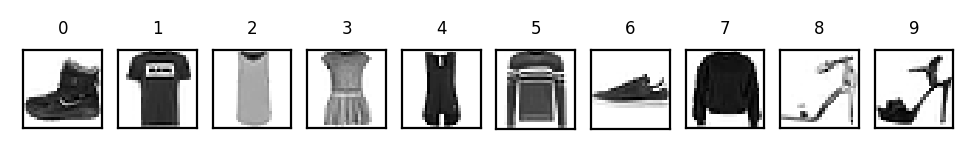

In [179]:
subfiglist = []
titles=[]

for i in range(0,10):
    subfiglist.append(X[i])
    titles.append(i)

buildFigureList(plt.figure(1),subfiglist, titles, 10)
plt.show()

### a)  Analyze the main components of a class (6 points)

Write a piece of code that takes a set of 28x28 images as input and does the following:

- Compute and show the mean and the first two principle components as 
images
- Make a 2-dimensional scatter plot of the transformed data 
- Compute and show a small number of samples along each of the two main axes as images (as in the lecture)
- Compute and show a sample of input images along each of the two main axes as images (as in the lecture)

Apply your code to the class 0 (T-shirt/top) of Fashion MNIST. Answer the following questions:

- What aspect(s) of the data does the first component capture? 
- What aspect(s) of the data does the second component capture? 


In [358]:
################################################################################
##### Write a piece of code that takes a set of 28x28 images as input and ######
##### does the following                                                  ######
################################################################################

def get_grid(component1, component2, n_samples = 5):
    # In axis 1...
    max_c1 = component1.max()
    min_c1 = component1.min()
    lambda_1 = list(np.linspace(min_c1, max_c1, n_samples - 1))
    lambda_1.append(0) # Add center
    # In axis 2...
    max_c2 = component2.max()
    min_c2 = component2.min()
    
    lambda_2 = list(np.linspace(min_c2, max_c2, n_samples - 1))
    lambda_2.append(0) # Add center
    
    return np.asarray([(x,y) for x in sorted(lambda_1) for y in sorted(lambda_2)])

def do_analysis(X, y):
    
    img_shape = (28,28) # Here is where I do assume the input image is 28x28

    ############################################################################
    # Compute & show the mean and the first two principle components as images #
    ############################################################################
    fig, axes = plt.subplots(nrows = 1, ncols = 3)
    fig.set_size_inches(2, 2)
    
    # First, we compute and plot the mean 
    img_mean = np.mean(X, axis = 0).reshape(img_shape)
    axes[0].imshow(img_mean, cmap='gray_r'); 
    axes[0].set_title("Mean image", fontsize = 4)
    axes[0].get_xaxis().set_visible(False)
    axes[0].get_yaxis().set_visible(False)


    # Then we compute and plot the 2 principal components. We store the results
    # in different objects just for clarity.
    pca = PCA(n_components = 2)
    pca_fit = pca.fit(X) 
    pca_projected = pca.transform(X)
    
    axes[1].imshow(pca_fit.components_[0].reshape(img_shape), cmap='gray_r');
    axes[1].set_title("First component", fontsize = 4)
    axes[1].get_xaxis().set_visible(False)
    axes[1].get_yaxis().set_visible(False)


    axes[2].imshow(pca_fit.components_[1].reshape(img_shape), cmap='gray_r');
    axes[2].set_title("Second component", fontsize = 4)
    axes[2].get_xaxis().set_visible(False)
    axes[2].get_yaxis().set_visible(False)

    ############################################################################
    ########  Make a 2-dimensional scatter plot of the transformed data ########
    ############################################################################
    n_classes = len(np.unique(y)) # How many unique classes we have
    plt.subplots()
    plt.scatter(pca_projected[:, 0], pca_projected[:, 1], c = y, 
                cmap = plt.cm.get_cmap('spectral', n_classes)) 
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Plot of the 2 principal components + grid')
    plt.colorbar()
    

    ############################################################################
    ### Compute and show a small number of samples along each of the two main ##
    ### axes as images (as in the lecture) #####################################
    ############################################################################

    grid = get_grid(pca_projected[:, 0], pca_projected[:, 1], 5)
    # Make all possible combinations of points to make the grid and plot it
    plt.scatter(grid[:, 0], grid[:, 1], c = 'r', label = grid) 
    
    for point in grid:
        plt.annotate("({:.2f},\n{:.2f})".format(point[0], point[1]),
                     xy = (point[0], point[1]),
                     xytext = (5, 2), size = 4,
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
    
    fig, axes = plt.subplots(nrows = 5, ncols = 5)
    axes = np.flip(axes.T, axis = 1).flatten()
    plt.suptitle('Sample of points', fontsize = 6)
    fig.tight_layout()
    for i, point in enumerate(grid):
        coordinate = [point[0], point[1]]
        sample = pca.inverse_transform([coordinate])
        
        # Compute the formula
        res = img_mean.flatten() + coordinate[0]*pca_fit.components_[0] + coordinate[1]*pca_fit.components_[1]

        pixels = res.reshape(img_shape)
        axes[i].imshow(pixels, cmap = 'gray_r')
        axes[i].set_title("({:.2f},{:.2f})".format(coordinate[0], coordinate[1]),
                          fontsize = 4)
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
        fig.tight_layout()
    
    ############################################################################
    ### Compute and show a sample of input images along each of the two main ###
    #axes as images (as in the lecture)
    # two main axes as images (as in the lecture)
    ############################################################################

    neigh = NearestNeighbors(n_neighbors = 2, p = 2)
    neigh.fit(X)

    fig, axes = plt.subplots(nrows = 5, ncols = 5)
    axes = np.flip(axes.T, axis = 1).flatten()
    plt.suptitle('Sample of Input images', fontsize = 6)
    fig.tight_layout()
    
    # Work with the same datapoints
    for i, point in enumerate(grid):
        coordinate = [point[0], point[1]]
        sample = pca.inverse_transform([coordinate]) 

        # Compute the formula
        res = img_mean.flatten() + coordinate[0]*pca_fit.components_[0] + coordinate[1]*pca_fit.components_[1]
        
        # Get nearest neighbor in the actual 
        distances, indexes = neigh.kneighbors([res])
        index_neighbor =  indexes[0, 1]
        real_img = X[index_neighbor]

        pixels = real_img.reshape(img_shape)
        axes[i].imshow(pixels, cmap = 'gray_r')
        axes[i].set_title("({:.2f},{:.2f})".format(coordinate[0], coordinate[1]), 
                          fontsize = 4)
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
        fig.tight_layout()

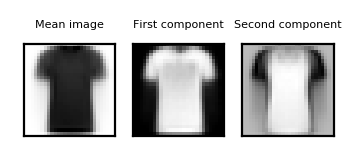

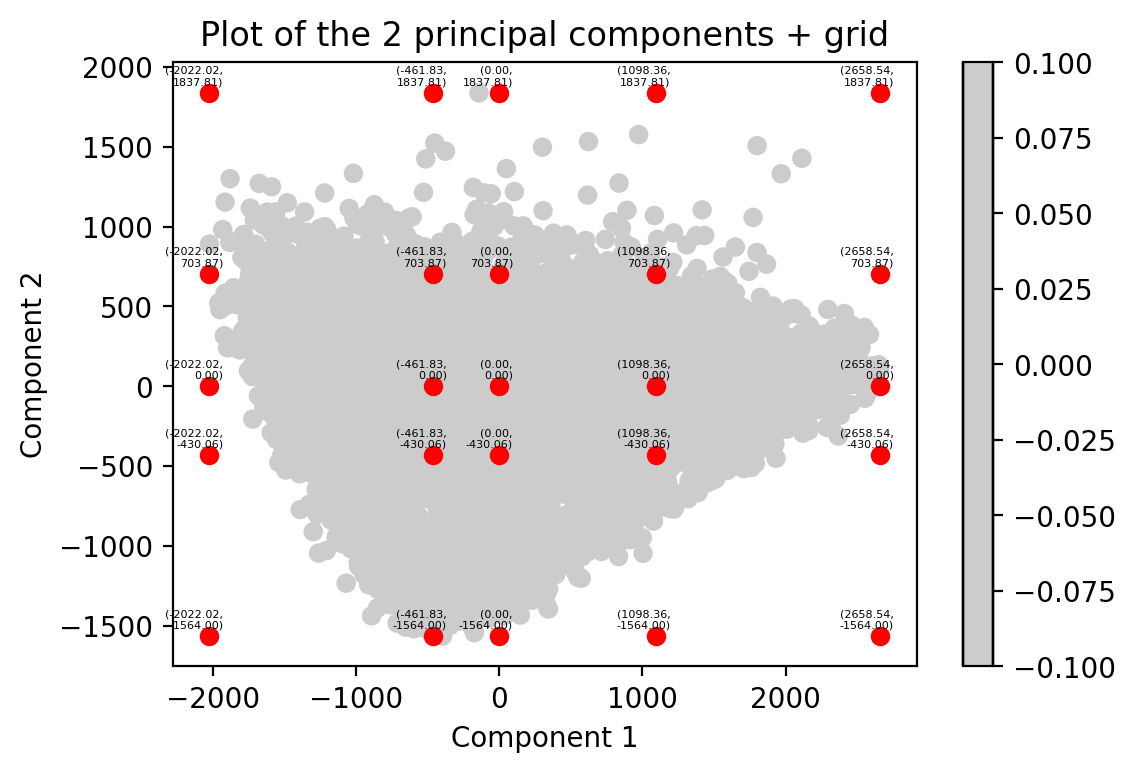

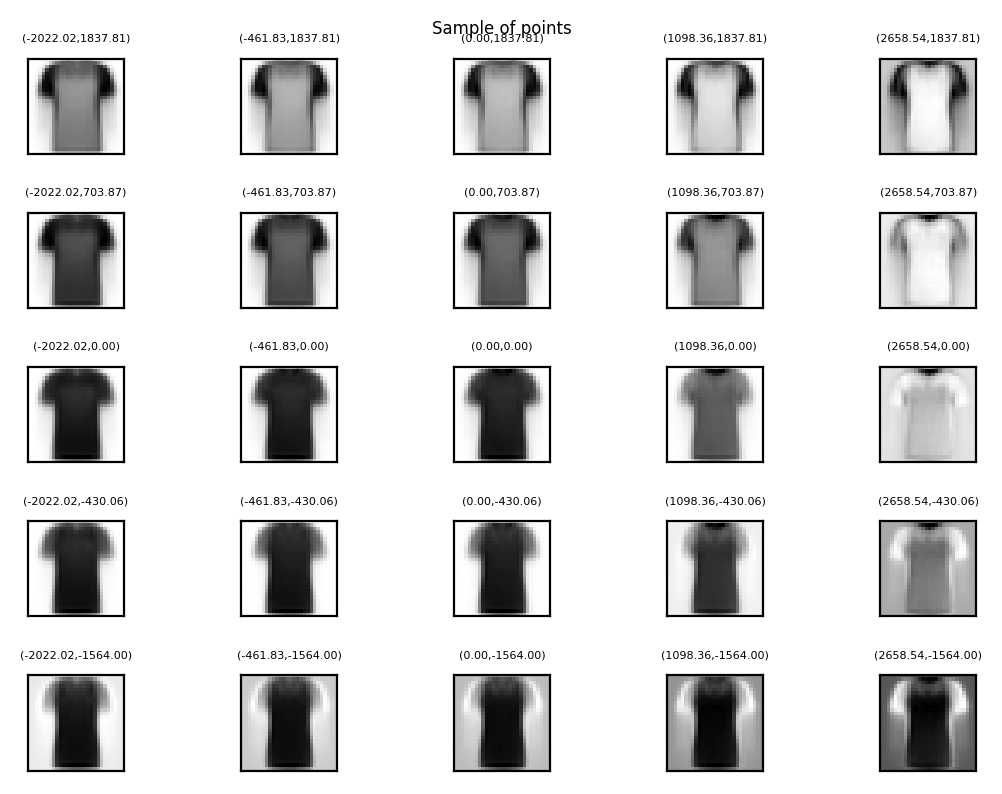

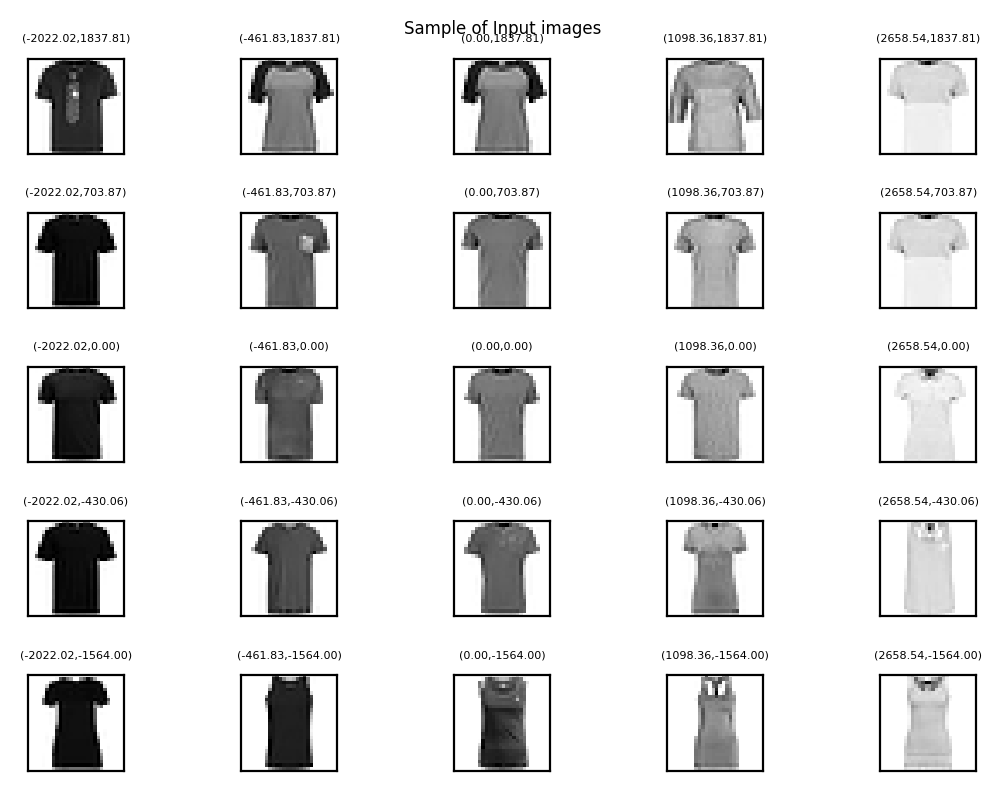

In [359]:
indices_tshirt = np.argwhere(y == 0).flatten()

X_tshirt = X[indices_tshirt]
y_tshirt = y[indices_tshirt]

do_analysis(X_tshirt, y_tshirt)

#### Analysis:

The first component (horizontal axis) is mainly controling the difference between the foreground and the background of the image (foreground/background separation) and the component 2 is controling the shape of the edges based in the background (countour). Consequently, when moving along the x-axis we obtain images with different luminosities in the object (brighter in a high x-value and darker in a low one) and once mixed with the y-axis we vary the shape of the edges in the clothes (with no sleeves in low values). This can be observed from the initial plot where the second component is clearly identifying the sleeves and the first component is only separating the shirt and the background.

As a final note, we can also observe that the central point contains the most neutral information in the dataset.

### b) Analyze two classes together and separately (2 points)

Apply the same analysis as in a) to the following subsets of data points:

- images in the union of class 2 and 4 (Pullover and Coat). In the scatter plot, indicate the two classes by color. 
- images in class 2 (Pullover). 
- images in class 4 (Coat). 

Compare the three analyses.  

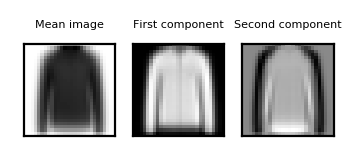

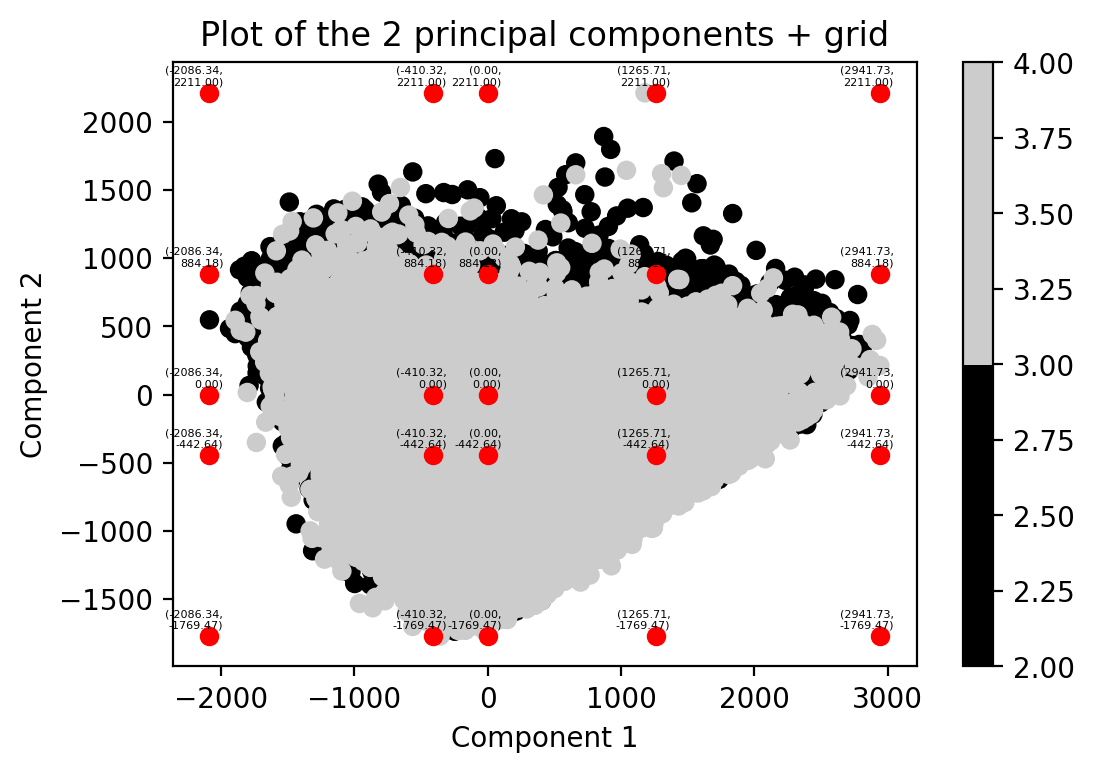

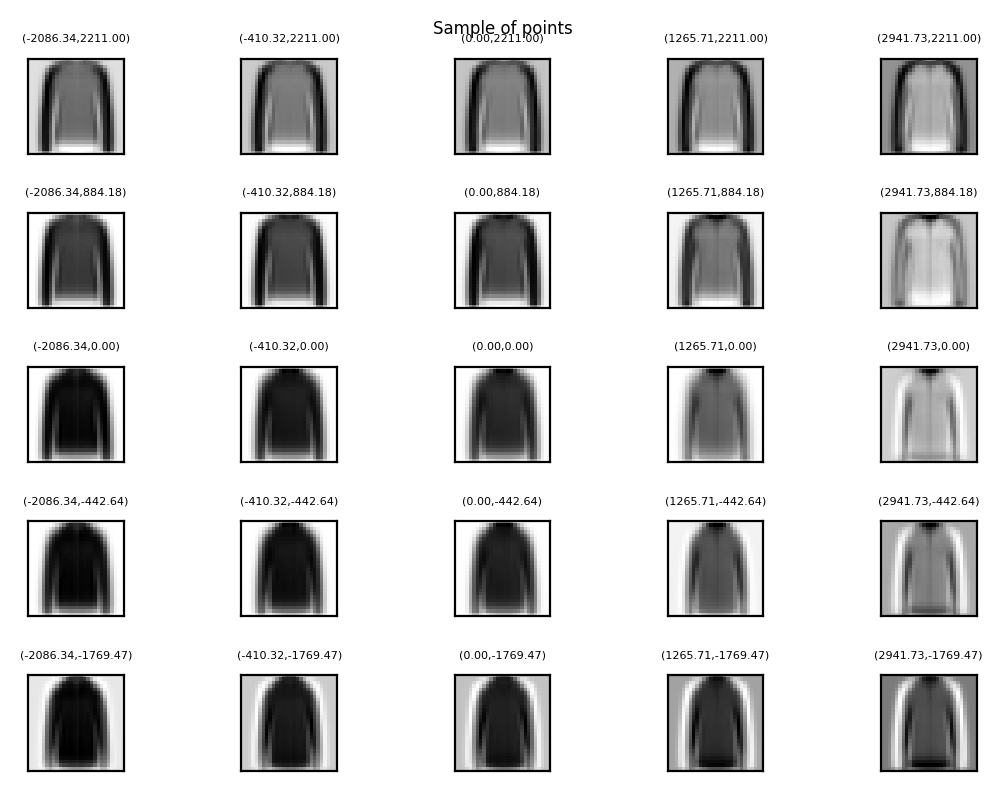

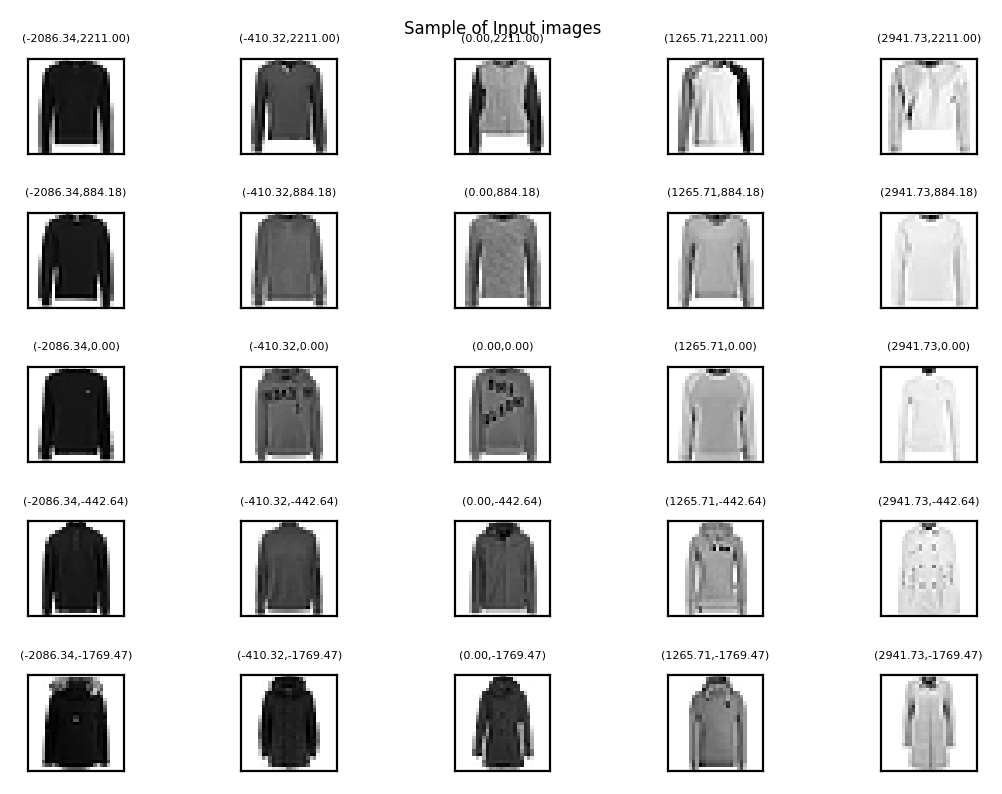

In [352]:
# images in the union of class 2 and 4 (Pullover and Coat). 

indices_pullover = np.argwhere(y == 2).flatten()
indices_coat = np.argwhere(y == 4).flatten()
indices_pullover_coat = np.concatenate((indices_pullover, indices_coat), axis = 0)

X_pullover_coat = X[indices_pullover_coat]
y_pullover_coat = y[indices_pullover_coat]

do_analysis(X_pullover_coat, y_pullover_coat)

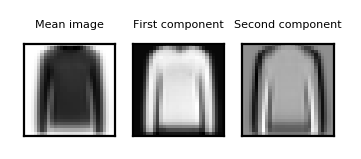

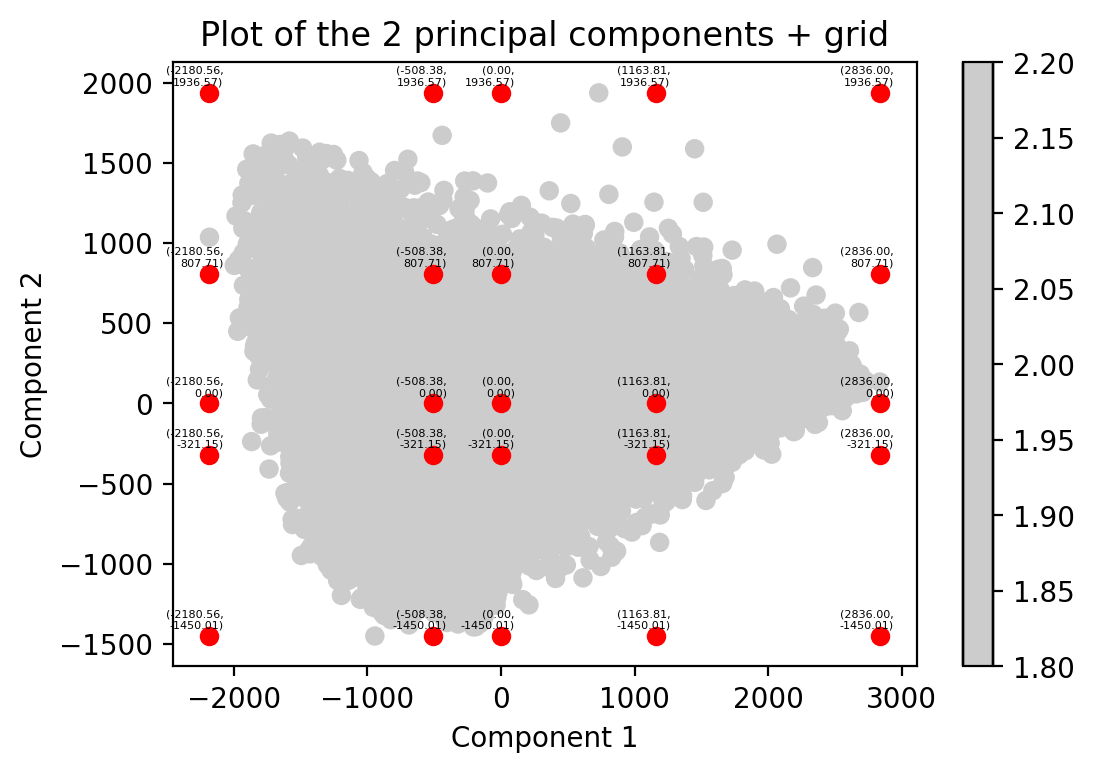

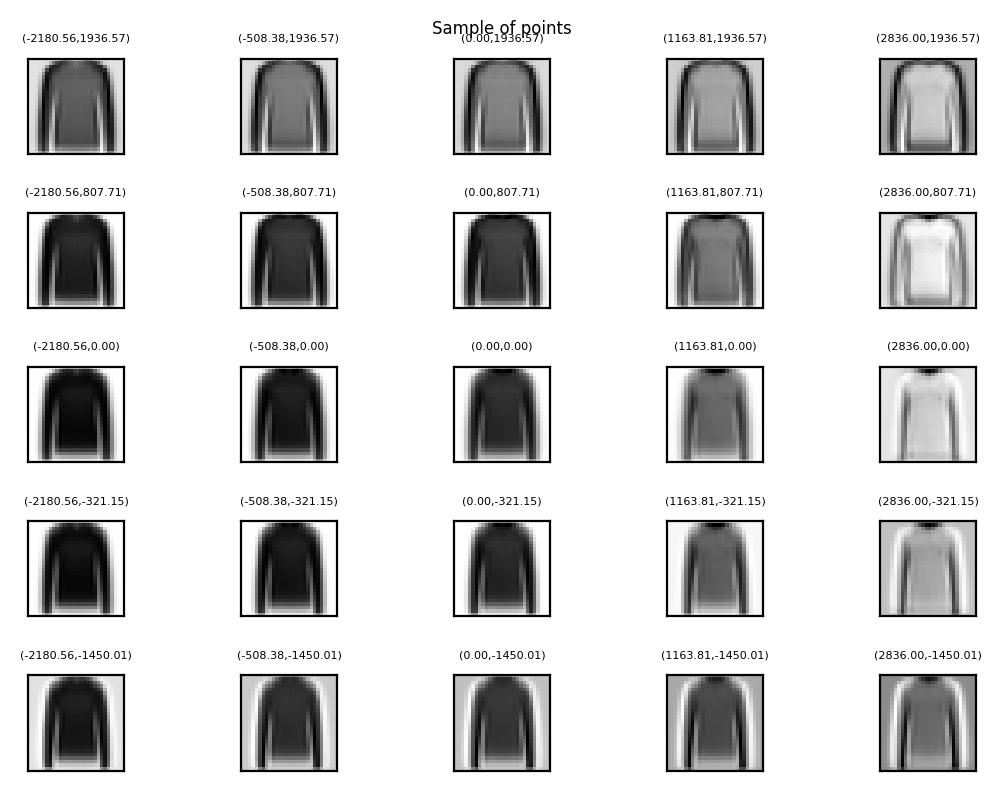

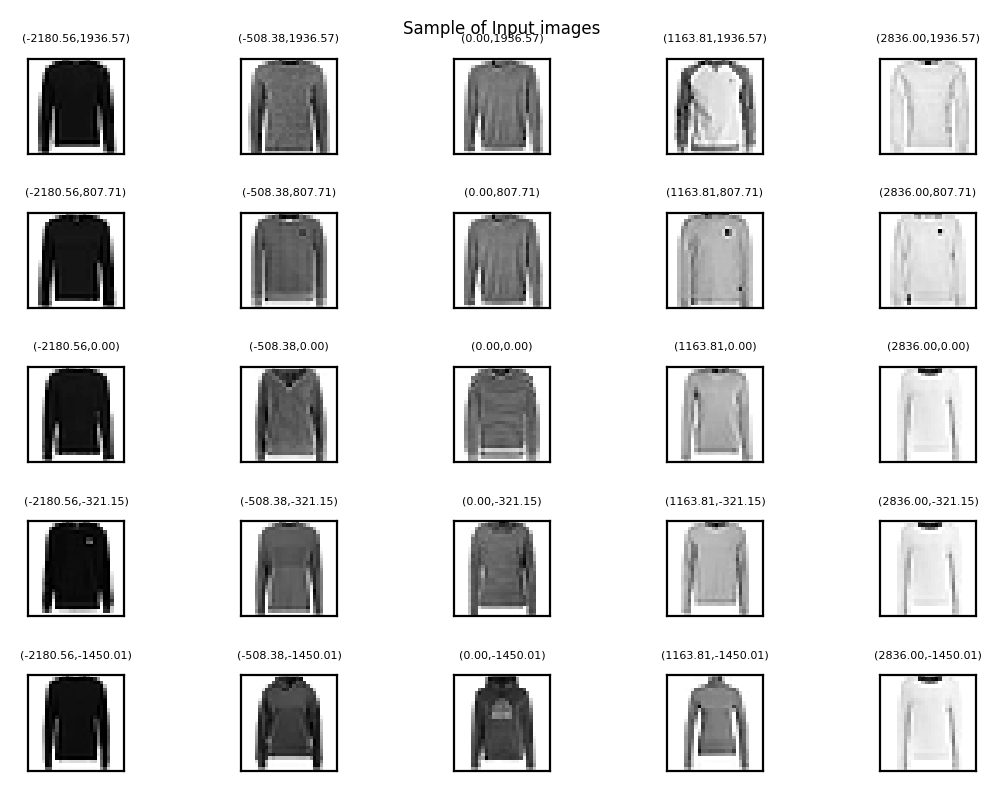

In [353]:
# images in class 2 (Pullover).

# images in the union of class 2 and 4 (Pullover and Coat). 
X_pullover = X[indices_pullover]
y_pullover = y[indices_pullover]

do_analysis(X_pullover, y_pullover)

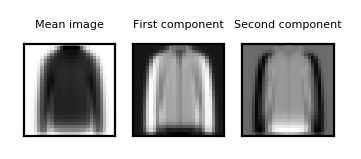

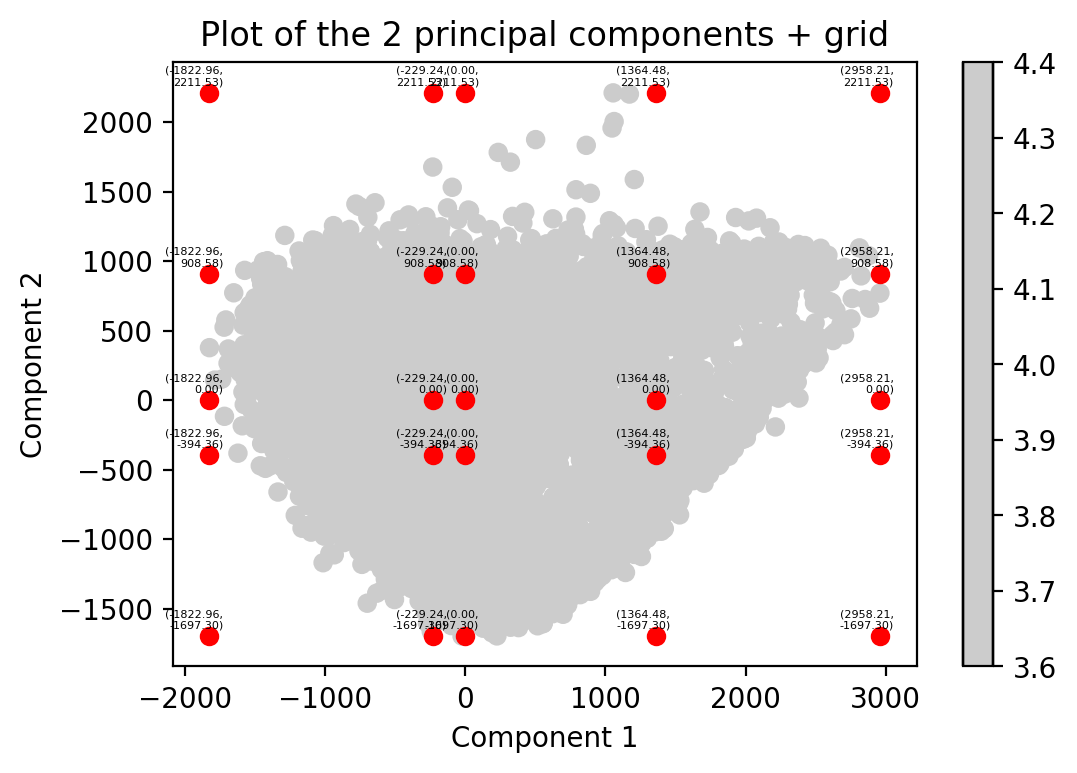

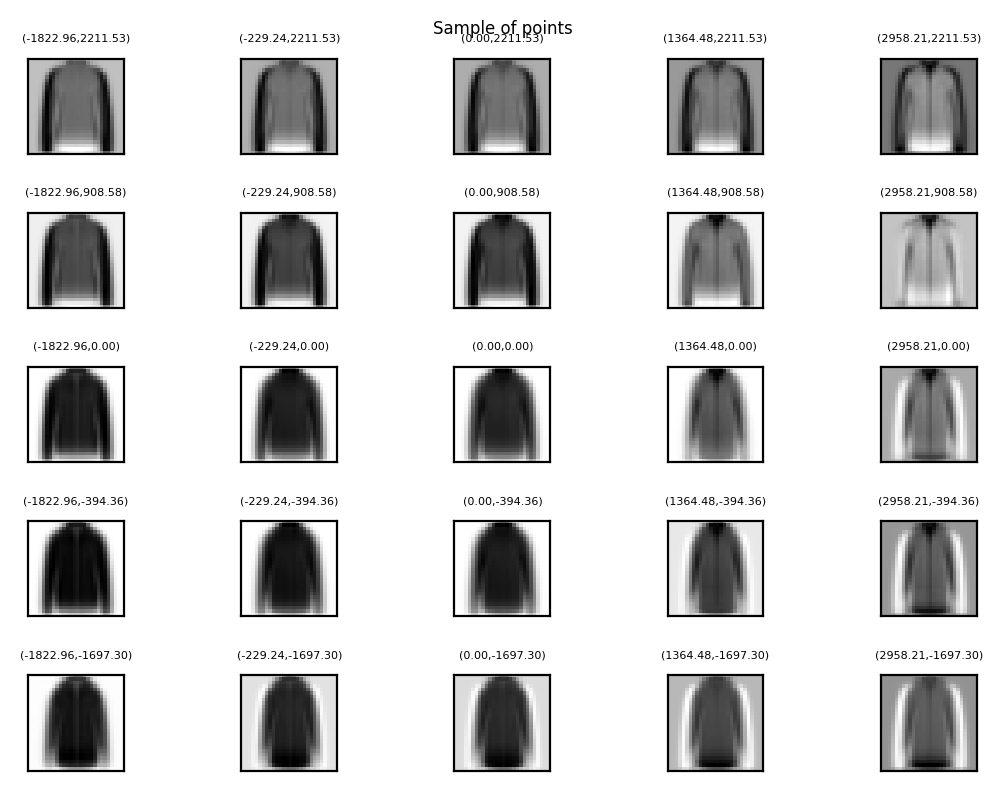

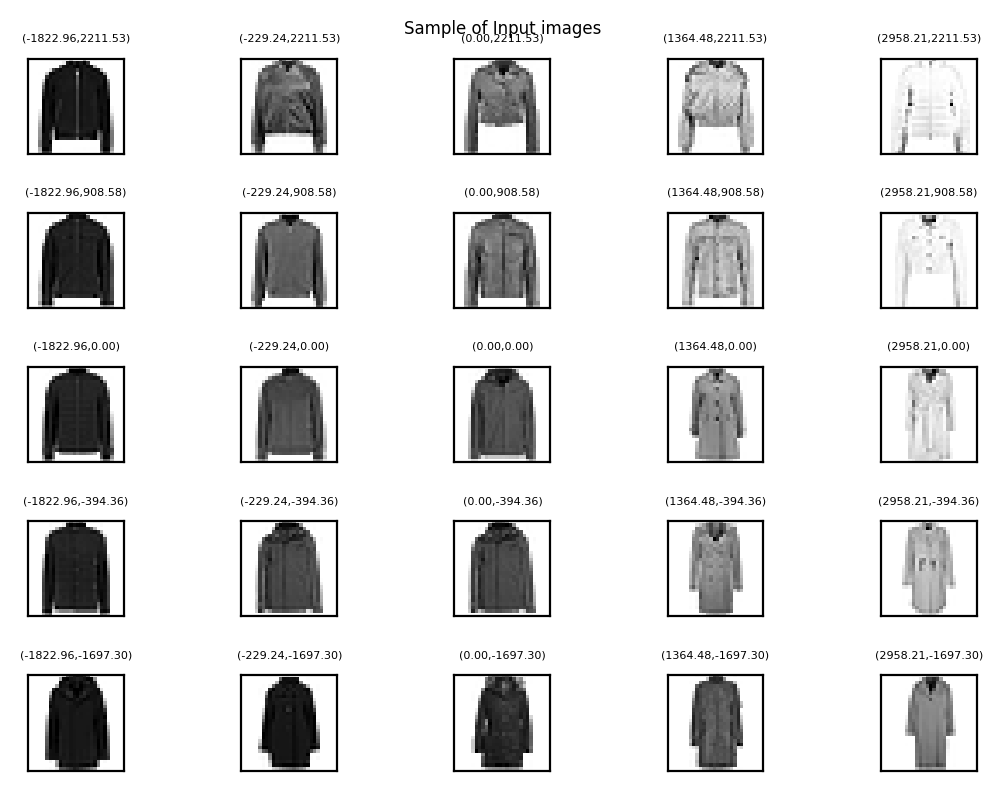

In [354]:
# images in class 4 (coat).

# images in the union of class 2 and 4 (Pullover and Coat). 
X_coat = X[indices_coat]
y_coat = y[indices_coat]

do_analysis(X_coat, y_coat)

#### Analysis:

For these subsets one can observe a similar behaviour than in the t-shirt subset. The x-axis is controling the foreground (brightness of the clothes) and the y-axis is controling the background (shape). For the mixed subset (pullover + coat) we can observe a bit more of predominance of the pullover information, however in high values of the component 1 and low values of the component 2 one can see more information related to the coat. This can be also observed in the components plot where in the top right corner this phenomena is more visible.



### c) Analyze a cluster computed by k-means (2 Points)

Run k-means on Fashion MNIST with k=10 using k-means++ and random_state=0. 

Compute and show a confusion matrix of the clusters with respect to the original labels. 

Choose a cluster where more than one class is predominant.
Apply the same analysis as in a) to the components of the chosen cluster. In the scatter plot, indicate the original class labels with color.

In [355]:
# Run k-means on Fashion MNIST with k=10 using 
#   k-means++ and random_state = 0

# Method for initialization, defaults to ‘k-means++’ (from doc)
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(X)

In [362]:
# Compute and show a confusion matrix of the clusters with respect to the original labels

y_pred = kmeans.labels_
y_true = y
cf_matrix = confusion_matrix(y_true, y_pred)

labels = fmnist_classes.values()

# Increase the number of columns to be shown by pandas
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 400)

c_matrix = pd.DataFrame(cf_matrix, index = labels, columns = range(10))
c_matrix

,0,1,2,3,4,5,6,7,8,9
T-shirt/top,0,202,3,3997,683,0,28,1821,233,33
Trouser,0,72,0,285,178,0,3,157,6305,0
Pullover,1,4086,1,136,573,0,30,2129,13,31
Dress,0,59,0,1958,614,0,7,636,3716,10
Coat,0,4219,0,1016,292,0,20,1237,182,34
Sandal,306,0,1678,2,4412,549,4,35,1,13
Shirt,1,2266,7,1246,886,0,76,2427,74,17
Sneaker,28,0,5457,0,567,947,1,0,0,0
Bag,7,333,272,26,578,76,2570,260,34,2844
Ankle boot,3119,1,185,2,201,3443,4,40,3,2


In [363]:
c_matrix.describe()

,0,1,2,3,4,5,6,7,8,9
count,10.00,10.00,10.00,10.0,10.00,10.00,10.00,10.00,10.00,10.00
mean,346.20,1123.80,760.30,866.8,898.40,501.50,274.30,874.20,1056.10,298.40
std,978.89,1737.21,1729.55,1290.2,1254.51,1082.34,806.95,950.23,2173.13,894.53
min,0.00,0.00,0.00,0.0,178.00,0.00,1.00,0.00,0.00,0.00
25%,0.00,15.50,0.25,8.0,360.75,0.00,4.00,69.25,5.50,4.00
50%,1.00,137.00,5.00,210.5,575.50,0.00,13.50,448.00,54.00,15.00
75%,22.75,1782.75,250.25,1188.5,665.75,430.75,29.50,1675.00,220.25,32.50
max,3119.00,4219.00,5457.00,3997.0,4412.00,3443.00,2570.00,2427.00,6305.00,2844.00


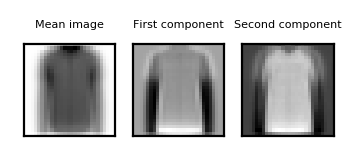

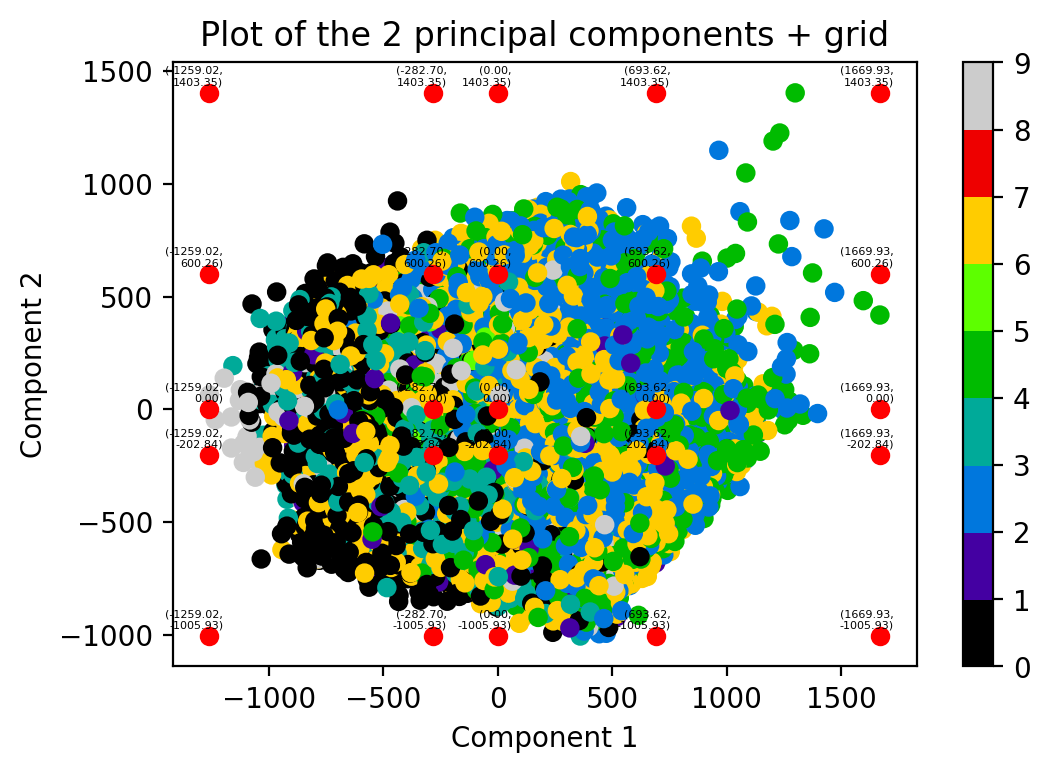

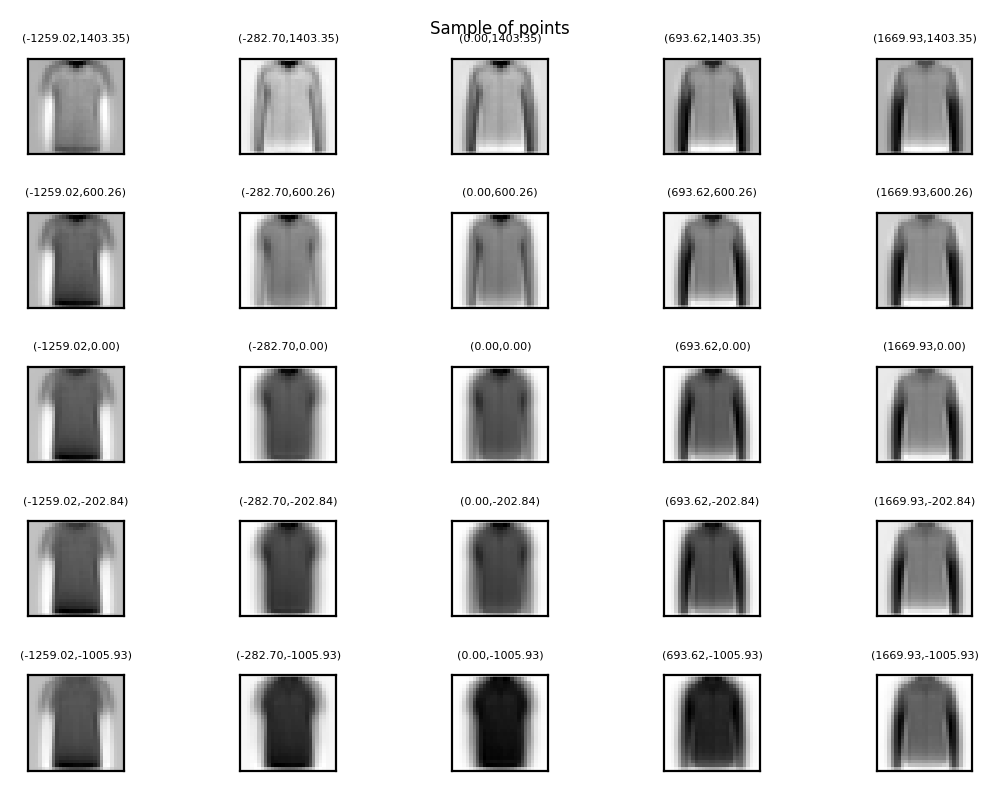

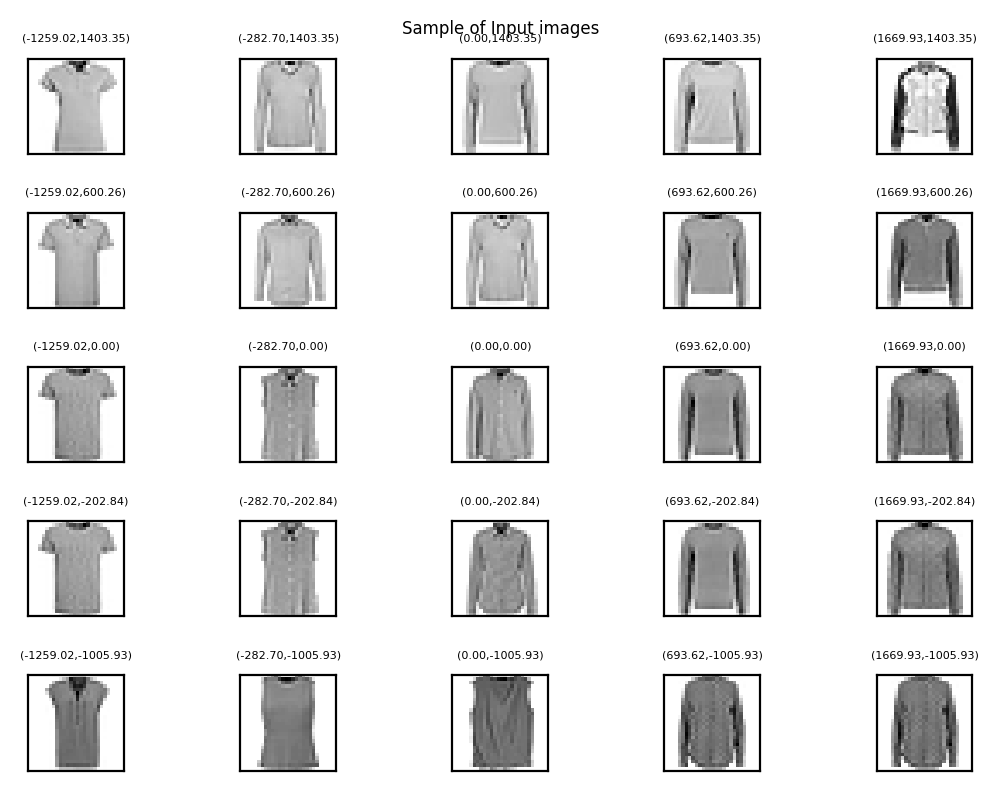

In [361]:
indices_cluster = np.argwhere(y_pred == 7).flatten()

X_cluster = X[indices_cluster]
y_cluster = y[indices_cluster]

do_analysis(X_cluster, y_cluster)

#### Analysis:

The cluster 7 has been choosen since it is the one with the more balanced classes (as observed in the descriptive statistics: good std and percentiles in harmony with the min and max values).

For the PCA of the k-means one can see that our previous analysis does not hold anymore and many classes are included. To build a new reasoning we can first think about the categories of clothes that are included in that cluster, which are mainly clothes for the torso. The PCA components try to describe the main differences in between the similar categories (t-shirt, pullover, coat, shirt).

Specifically, the first component is capturing very well the differences in the sleeves. We can clearly see this in the retrieved images where in the most-left part short sleeves can be observed and in the most-right the oppsotie happens. On the other hand, the second component is not able to identify a clear pattern, but introduces the difference in shape on the chest and belly of the clothes. For instance, in the top part of the clothes matrix we observe "plain" objects and while traversing the y-axis we can identify objects with buttons or other shapes.